In [62]:
from clustersim.core.simulator import Simulator
from clustersim.core.resources import GpuSet

sim = Simulator()

sim.add_node({'gpus': GpuSet([1, 1, 1, 1])})
dispatcher = sim.add_dispatcher('random')

for i in range(4):
    dispatcher.add_workload('unified_random',
                            income_range=(4, 16), tasktime_range=(4, 9),
                            resources={'gpus': [0.5, 0.5]})
dispatcher.add_scheduler('basic', sim.nodes, scheme='best_fit')

sim.run(until=2000)

In [63]:
node_stats = sim.nodes[0].records
display(node_stats.loc[:, ('gpu-util', 'task')].head(10))

node_ts = node_stats.loc[:,('gpu-util', 'task')] \
    .reindex(range(0, int(node_stats.index[-1])), method='pad')

,gpu-util,task
8.000000,0.25,1.0
10.000000,0.50,2.0
12.000000,0.75,3.0
13.314929,0.50,2.0
15.000000,0.75,3.0
17.000000,1.00,4.0
18.010107,0.75,3.0
20.000000,1.00,4.0
20.552970,0.75,3.0
22.000000,1.00,4.0


In [64]:
import pandas as pd
import numpy as np

def moving_avg(series, window):
    if window <= 0:
        return series
    
    if len(series) < window:
        return pd.Series()
    
    new_series = pd.Series(dtype=np.float32)
    for i in range(len(series)-window+1):
        new_series.loc[i] = series.loc[i:i+window-1].mean()

    return new_series

<AxesSubplot:title={'center':'gpu moving average 0.69'}>

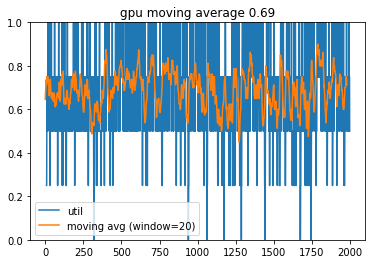

In [66]:
avg = node_ts['gpu-util'].mean()
gpu_util_ma = moving_avg(node_ts['gpu-util'], 20)

util = pd.DataFrame({'util': node_ts['gpu-util'], 'moving avg (window=20)': gpu_util_ma})
util.plot(title='gpu moving average %.2f' % avg, ylim=[0,1])

<AxesSubplot:title={'center':'avg tasks in queue 2.75'}>

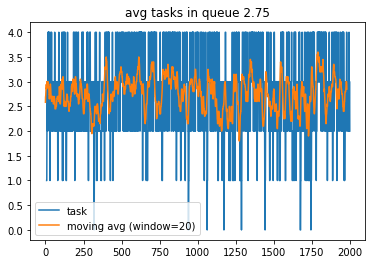

In [69]:
avg = node_ts['task'].mean()

tasks_ma = moving_avg(node_ts['task'], 20)
tasks_num = pd.DataFrame({'task': node_ts['task'], 'moving avg (window=20)': tasks_ma})
tasks_num.plot(title='avg tasks in queue %.2f' % avg)
